In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
files.upload()
df=pd.read_csv('h.csv')

Saving h.csv to h.csv


In [ ]:
df.sample(5)

,SL.,Comment,Hate,Type
1197,1198,Vaia apni gonybekary te vdo krsen apnr basha ktay,No,Not Hate
3948,3949,chagol mohila,Yes,Slang
1681,1682,dud ta goo ...koto size goo,Yes,Sexual
3223,3224,ek kere vala kam korsen,No,Not Hate
2175,2176,Masalla jibon a onk boro hon,No,Not Hate


In [ ]:
df.shape

(5000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SL.      5000 non-null   int64 
 1   Comment  5000 non-null   object
 2   Hate     5000 non-null   object
 3   Type     5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [ ]:
df.drop(columns=['Type'],inplace=True)

In [ ]:
df.drop(columns=['SL. '],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5000 non-null   object
 1   Hate     5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [ ]:
df.rename(columns={'Hate':'target','Comment':'text'},inplace=True)
df.head()

,text,target
0,Kanki ki der Allah sob samoy valo rake,Yes
1,khanki akta,Yes
2,Ore saniliyon,Yes
3,Bokachoda Shangbadik,Yes
4,Balda dekhaiche,Yes


In [ ]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['target'].value_counts()

Yes    2836
No     2164
Name: target, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df['target'].value_counts()

1    2836
0    2164
Name: target, dtype: int64

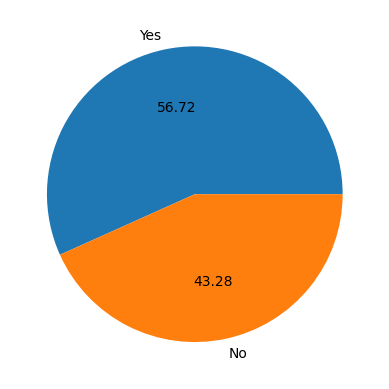

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Yes','No'],autopct="%0.2f")
plt.show()

In [ ]:
text="i am a student"
tokens = text.split()
print(tokens)
print(" ".join(tokens))

['i', 'am', 'a', 'student']
i am a student


In [ ]:
omments4=[]
omments3=[" i am a ki student e","he is a r ki","he not ki  e ki"]
stop_words=['ki','e','ei','r']
for i in range(0,len(omments3)):
  text=omments3[i]
  tokens=text.split()
  tokens2=text.split()
  print(tokens)
  print(len(tokens))
  for m in range(0,len(tokens)):
    for h in range(0,len(stop_words)):
       word=tokens[m]
       if word==stop_words[h]:
        print(word)
        tokens2.remove(word)
  print(tokens2)


['i', 'am', 'a', 'ki', 'student', 'e']
6
ki
e
['i', 'am', 'a', 'student']
['he', 'is', 'a', 'r', 'ki']
5
r
ki
['he', 'is', 'a']
['he', 'not', 'ki', 'e', 'ki']
5
ki
e
ki
['he', 'not']


In [ ]:
omments4=[]
omments3=[" i am a ki student e","he is a r ki","he not ki  e ki"]
stop_words=['ki','e','ei','r']
for i in range(0,len(omments3)):
  text=omments3[i]
  tokens1=text.split()
  tokens2=text.split()
  print(tokens1)
  for m in tokens1:

    if m in stop_words:
      print(stop_words)
      tokens2.remove(m)
  print(tokens2)

  omments4.append(" ".join(tokens2))
  print(omments4)
  tokens.clear()


['i', 'am', 'a', 'ki', 'student', 'e']
['ki', 'e', 'ei', 'r']
['ki', 'e', 'ei', 'r']
['i', 'am', 'a', 'student']
['i am a student']
['he', 'is', 'a', 'r', 'ki']
['ki', 'e', 'ei', 'r']
['ki', 'e', 'ei', 'r']
['he', 'is', 'a']
['i am a student', 'he is a']
['he', 'not', 'ki', 'e', 'ki']
['ki', 'e', 'ei', 'r']
['ki', 'e', 'ei', 'r']
['ki', 'e', 'ei', 'r']
['he', 'not']
['i am a student', 'he is a', 'he not']


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
comments1=df['text']
y=df['target']

In [ ]:
print(comments1)

0                  Kanki ki der Allah sob samoy valo rake
1                                             khanki akta
2                                           Ore saniliyon
3                                    Bokachoda Shangbadik
4                                         Balda dekhaiche
                              ...                        
4995                      erum chahara loya gf asha koros
4996    tor ma durga ar radha ke bol amake shukh dia jete
4997                              tora to nun puja korish
4998    malaun er bachchader dekhle bojha jau malura k...
4999                          assa ei 72 hurera ki bessa?
Name: text, Length: 5000, dtype: object


In [ ]:
import string

In [ ]:


def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    return text

comments2 = [remove_punctuation(text) for text in comments1]

In [ ]:
for i in range(0,10):
  print(comments2[i])

Kanki ki der Allah sob samoy valo rake
khanki akta
Ore saniliyon
Bokachoda Shangbadik
Balda dekhaiche
Shob Gorther Lilakhela
Sobai sundorer pujari
lerimoni
Jana Galo Pori moner akta cheler khoj
Pori apu valo hoya gese


In [ ]:

comments3=[]
for i in comments2:
  comments3.append(i.lower())

In [ ]:
comments4=[]
stop_words=['ki','e','ei','r','ar','ni','er','a','but','k','baaah','to','o','ai','by','the','way','kn','ta','ke','re','ra','or','na']
for i in range(0,len(comments3)):
  text=comments3[i]
  tokens1=text.split()
  tokens2=text.split()
  for m in tokens1:

    if m in stop_words:
      tokens2.remove(m)

  comments4.append(" ".join(tokens2))



In [ ]:
for i in range(20,40):
  print(comments4[i])

erkom bokachoda news channel thakle entertainment ovab hobe
tmdr mto shuar shangbadik shaua dekhaba
nastik
film star nah hoiya porn star houa dorkar chilo
eto tk koi pailo
ami lej kata magi
miss korlen
banglar sunny
gud becha tk diya shob shomvob
ufff amr poritar lagca
pasay dim therapy dawa hok
bon bivag dristy akorshon korchi
jiami
porimoni age theke manoshik protibondhi
holud shangbadik sagoler tin number baccha
potitar cheye oke beshi ghrina kore
tor mar heda
tomara media baler video banaiba
24 octobot porimonidiboser jonno zordabi janachi
banglar number one pornstar


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(ngram_range=(1,2))
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(comments3).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(5000, 11035)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 1: Train a Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.645
[[299  99]
 [256 346]]
0.7775280898876404


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.723
[[266 132]
 [145 457]]
0.7758913412563667


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.687
[[176 222]
 [ 91 511]]
0.6971350613915416


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
#svc = SVC(kernel='rbf', gamma=1.0)
svc = SVC(kernel='linear')

knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.703, 0.7520661157024794)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.703
Precision -  0.7520661157024794
For  KN
Accuracy -  0.611
Precision -  0.609007164790174
For  NB
Accuracy -  0.723
Precision -  0.7758913412563667
For  DT
Accuracy -  0.629
Precision -  0.6290502793296089
For  LR
Accuracy -  0.684
Precision -  0.716012084592145
For  RF
Accuracy -  0.693
Precision -  0.7178729689807977
For  AdaBoost
Accuracy -  0.644
Precision -  0.6576923076923077
For  BgC
Accuracy -  0.669
Precision -  0.7174959871589085
For  ETC
Accuracy -  0.69
Precision -  0.7347266881028939
For  GBDT
Accuracy -  0.642
Precision -  0.6455847255369929
For  xgb
Accuracy -  0.669
Precision -  0.6858710562414266


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.723,0.775891
0,SVC,0.703,0.752066
5,RF,0.693,0.717873
8,ETC,0.690,0.734727
4,LR,0.684,0.716012
7,BgC,0.669,0.717496
10,xgb,0.669,0.685871
6,AdaBoost,0.644,0.657692
9,GBDT,0.642,0.645585
3,DT,0.629,0.629050


In [ ]:
print("python")

python


In [ ]:
sum=0
for i in range(1,101,1):
  if i%2==0:
   sum=sum+i
avg=sum/50
print(avg)

51.0


In [ ]:
print("Mahbub")

Mahbub
